# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.ctime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | conduaga
Processing Record 2 of Set 1 | oamaru
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | basco
Processing Record 5 of Set 1 | palikir - national government center
Processing Record 6 of Set 1 | howrah
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | port isabel
Processing Record 9 of Set 1 | micheweni
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | puerto quijarro
Processing Record 13 of Set 1 | ataq
Processing Record 14 of Set 1 | san salvador de jujuy
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | kavarna
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | utrik
Processing Record 21 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,conduaga,8.8620,117.4893,79.86,82,5,6.29,PH,Mon Dec 11 10:58:25 2023
1,oamaru,-45.0784,170.9801,52.38,86,100,11.74,NZ,Mon Dec 11 10:58:25 2023
2,basco,20.4487,121.9702,79.72,78,14,12.77,PH,Mon Dec 11 10:58:25 2023
3,palikir - national government center,6.9248,158.1611,81.34,83,40,5.75,FM,Mon Dec 11 10:58:25 2023
4,howrah,22.5892,88.3103,68.00,68,0,3.44,IN,Mon Dec 11 10:58:26 2023


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conduaga,8.8620,117.4893,79.86,82,5,6.29,PH,Mon Dec 11 10:58:25 2023
1,oamaru,-45.0784,170.9801,52.38,86,100,11.74,NZ,Mon Dec 11 10:58:25 2023
2,basco,20.4487,121.9702,79.72,78,14,12.77,PH,Mon Dec 11 10:58:25 2023
3,palikir - national government center,6.9248,158.1611,81.34,83,40,5.75,FM,Mon Dec 11 10:58:25 2023
4,howrah,22.5892,88.3103,68.00,68,0,3.44,IN,Mon Dec 11 10:58:26 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

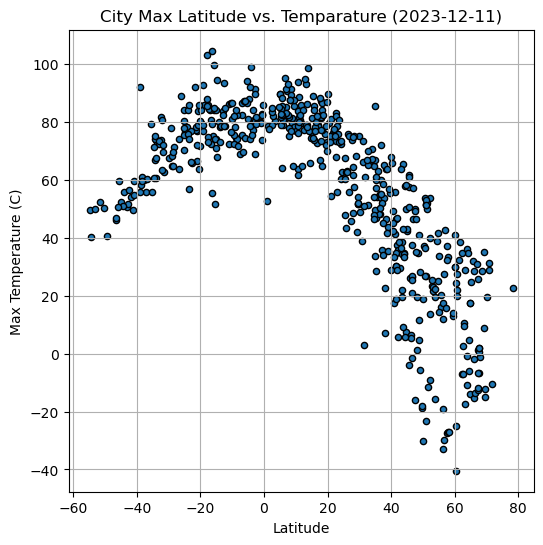

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat","Max Temp",figsize=[6,6],grid=True,edgecolors="black", 
                          title=f"City Max Latitude vs. Temparature ({time.strftime('%Y-%m-%d')})", ylabel="Max Temperature (C)", xlabel="Latitude")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

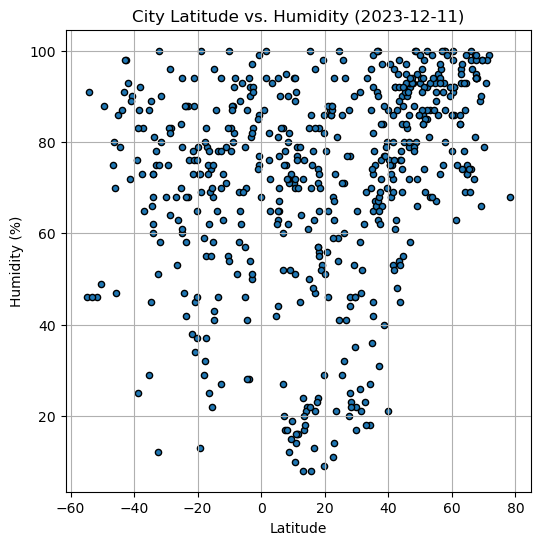

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat","Humidity",figsize=[6,6],grid=True,edgecolors="black", 
                          title=f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})", ylabel="Humidity (%)", xlabel="Latitude");
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

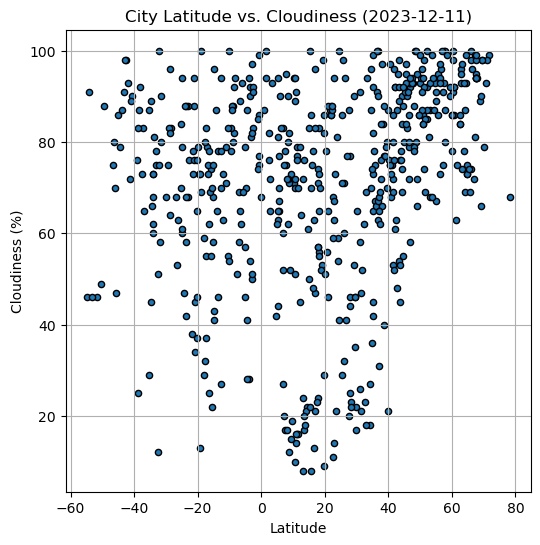

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat","Humidity",figsize=[6,6],grid=True,edgecolors="black", 
                          title=f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})", ylabel="Cloudiness (%)", xlabel="Latitude");
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

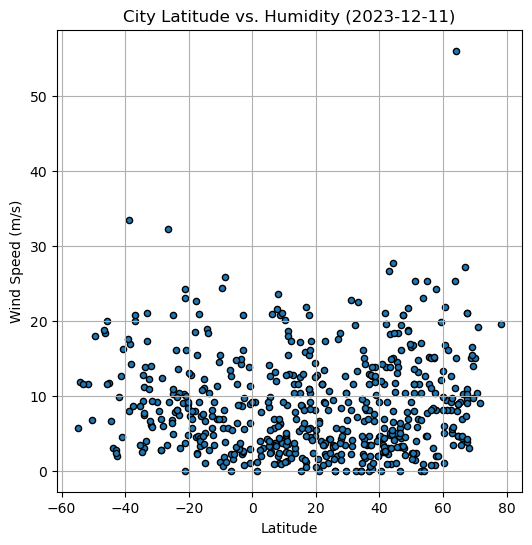

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat","Wind Speed",figsize=[6,6],grid=True,edgecolors="black", 
                          title=f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})", ylabel="Wind Speed (m/s)", xlabel="Latitude");

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
n_df = city_data_df[city_data_df.Lat>=0]

# Display sample data
n_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conduaga,8.8620,117.4893,79.86,82,5,6.29,PH,Mon Dec 11 10:58:25 2023
2,basco,20.4487,121.9702,79.72,78,14,12.77,PH,Mon Dec 11 10:58:25 2023
3,palikir - national government center,6.9248,158.1611,81.34,83,40,5.75,FM,Mon Dec 11 10:58:25 2023
4,howrah,22.5892,88.3103,68.00,68,0,3.44,IN,Mon Dec 11 10:58:26 2023
6,port isabel,26.0734,-97.2086,63.03,71,0,0.00,US,Mon Dec 11 10:58:26 2023


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
s_df = city_data_df[city_data_df.Lat<=0]

# Display sample data
s_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,oamaru,-45.0784,170.9801,52.38,86,100,11.74,NZ,Mon Dec 11 10:58:25 2023
5,hermanus,-34.4187,19.2345,66.99,66,0,9.24,ZA,Mon Dec 11 10:58:26 2023
7,micheweni,-4.9667,39.8333,81.25,79,80,6.33,TZ,Mon Dec 11 10:58:26 2023
9,avarua,-21.2078,-159.7750,77.05,88,75,24.16,CK,Mon Dec 11 10:58:26 2023
10,puerto quijarro,-17.7833,-57.7667,103.17,32,84,4.52,BO,Mon Dec 11 10:58:26 2023


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
def lrChart(x,y,title,tx,ty):
    plt.figure(figsize=[12,8])        
    plt.scatter(x,y,edgecolors="black")
    plt.grid(True)
    plt.title(f"Linear regression on {title} ({time.strftime('%Y-%m-%d')})")
    plt.xlabel("Latitude",{"fontsize":14})
    plt.ylabel(f"{y.name}",{"fontsize":14})
    
    lr = linregress(x,y)
    plt.plot(x,x*lr.slope+lr.intercept, c='r', linewidth=5)
    
    plt.annotate(f'y={lr.slope:.2f}x + {lr.intercept:.2f}', [tx,ty],c='r', fontsize=18)
    
    plt.savefig(f'output_data/{title}.png')
    plt.show()

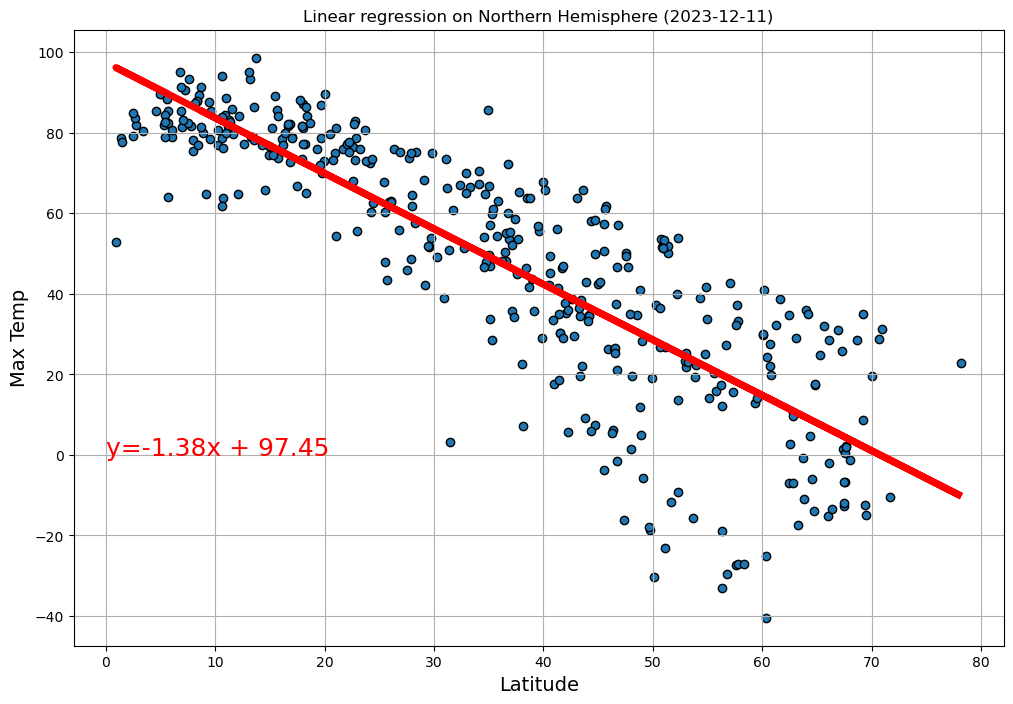

In [16]:
# Linear regression on Northern Hemisphere
n_df = city_data_df[city_data_df.Lat>=0]
lrChart(n_df.Lat,n_df['Max Temp'],'Northern Hemisphere',0,0)

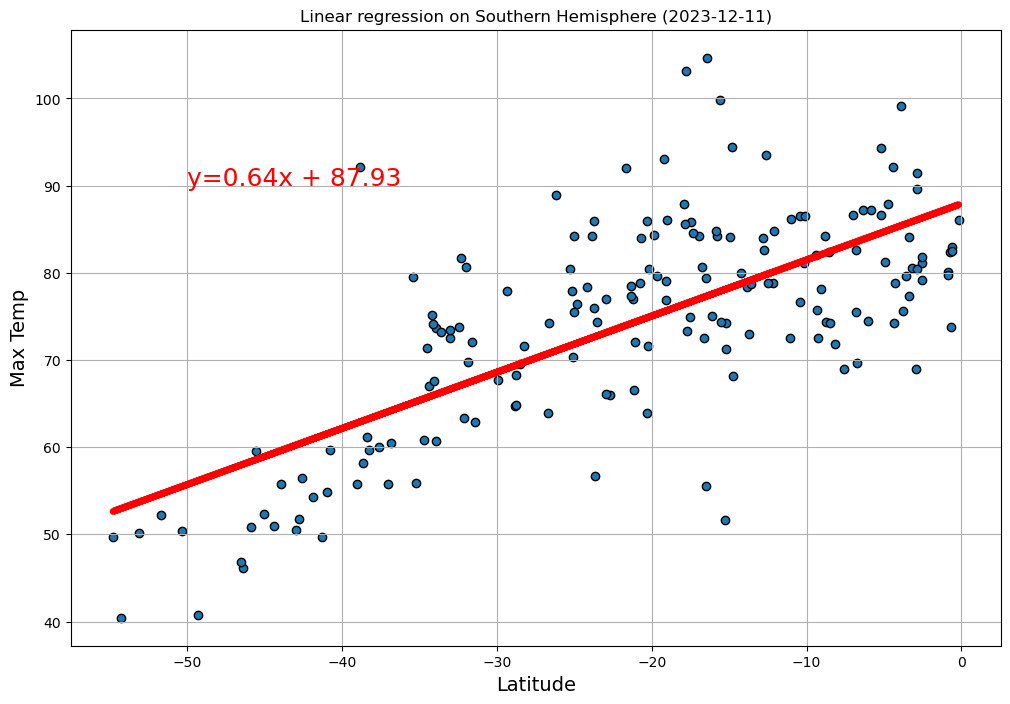

In [17]:
# Linear regression on Southern Hemisphere
s_df = city_data_df[city_data_df.Lat<=0]
lrChart(s_df.Lat,s_df['Max Temp'],'Southern Hemisphere',-50,90)

**Discussion about the linear relationship:** As we move away from the Equator (0) the temparature decreases that is why majority of the cities around the line of regression are showing this trend.

### Humidity vs. Latitude Linear Regression Plot

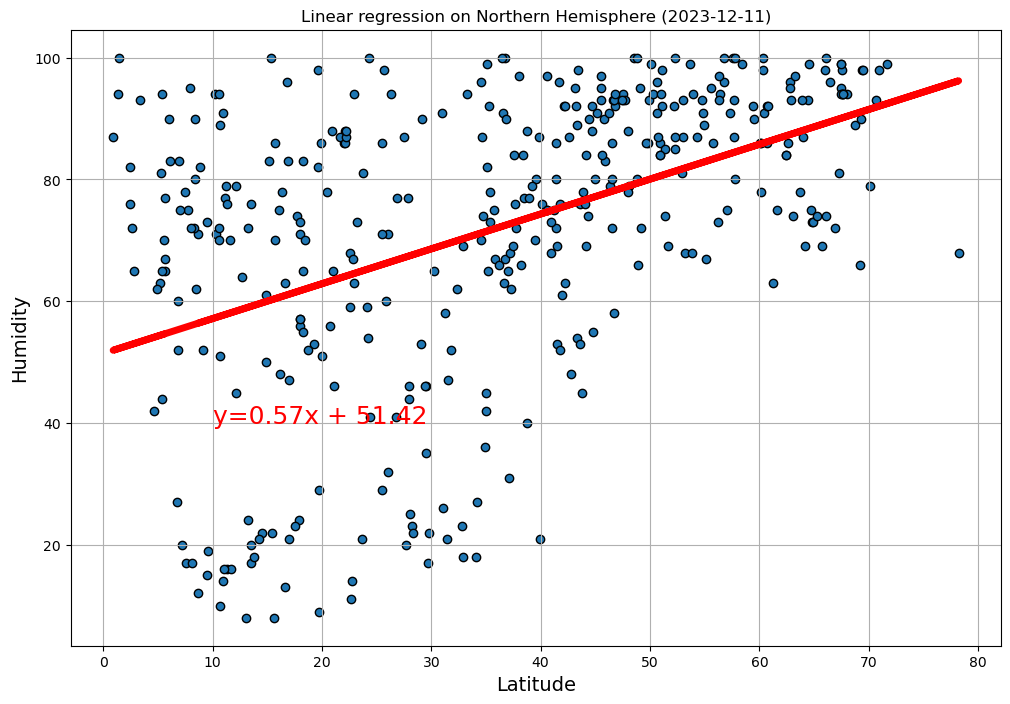

In [18]:
# Northern Hemisphere
n_df = city_data_df[city_data_df.Lat>=0]
lrChart(n_df.Lat,n_df['Humidity'],'Northern Hemisphere',10,40)

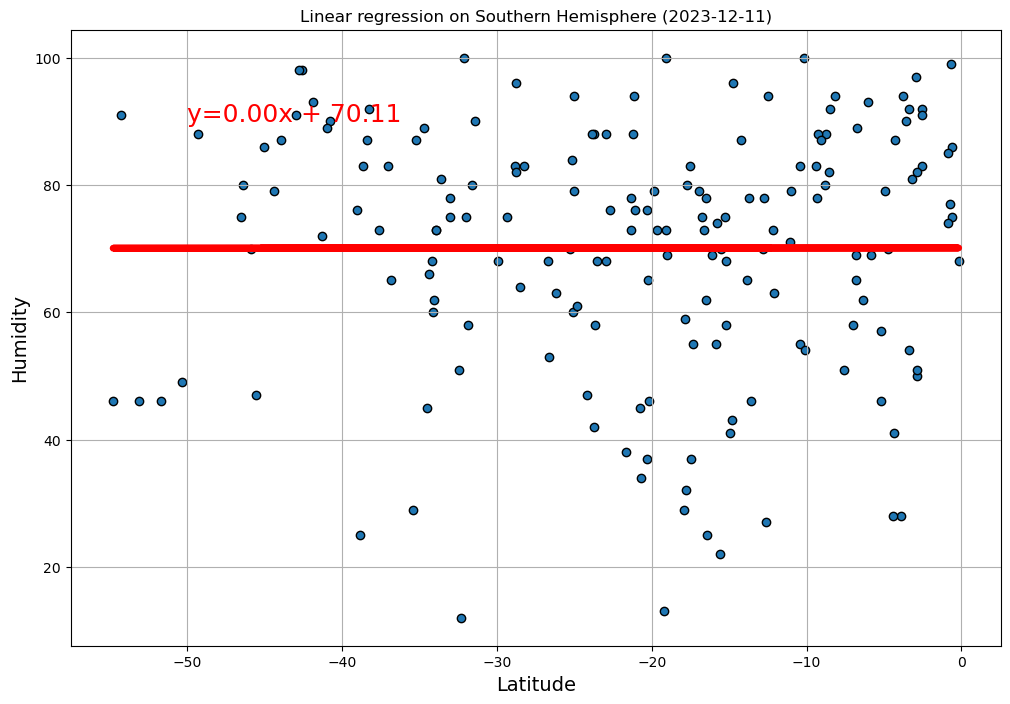

In [19]:
# Southern Hemisphere
lrChart(s_df.Lat,s_df['Humidity'],'Southern Hemisphere',-50,90)

**Discussion about the linear relationship:** The relationship between latitude and humidity does not strictly adhere to a linear pattern might be do to various  influencing factors such as proximity to water bodies, wind patterns, and seasonal variations.

### Cloudiness vs. Latitude Linear Regression Plot

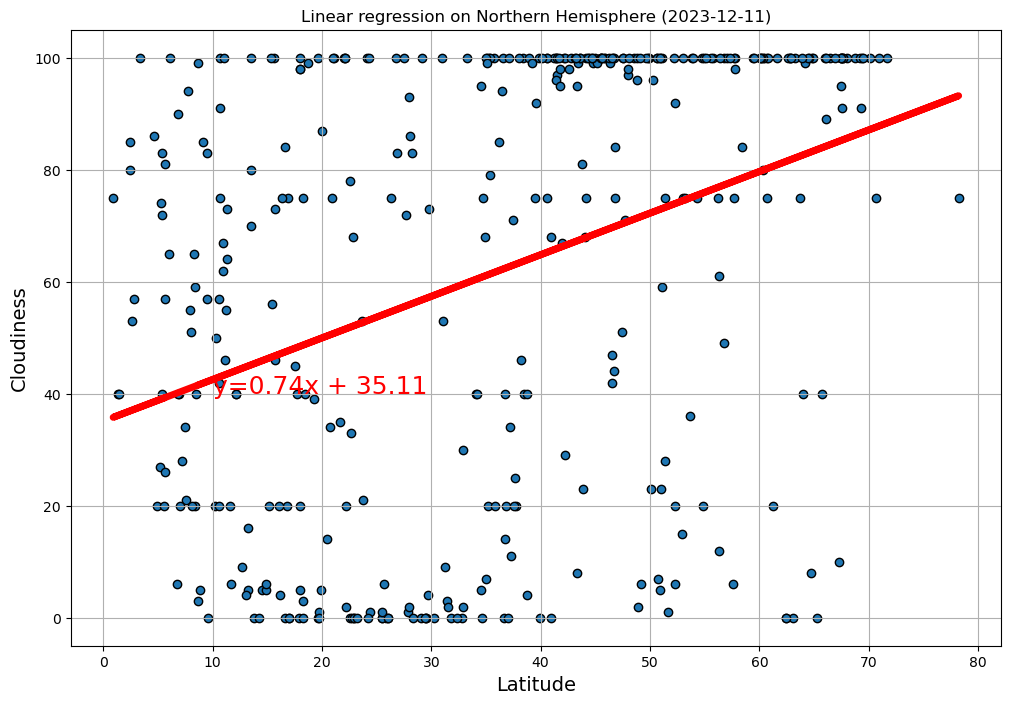

In [20]:
# Northern Hemisphere
lrChart(n_df.Lat,n_df['Cloudiness'],'Northern Hemisphere',10,40)

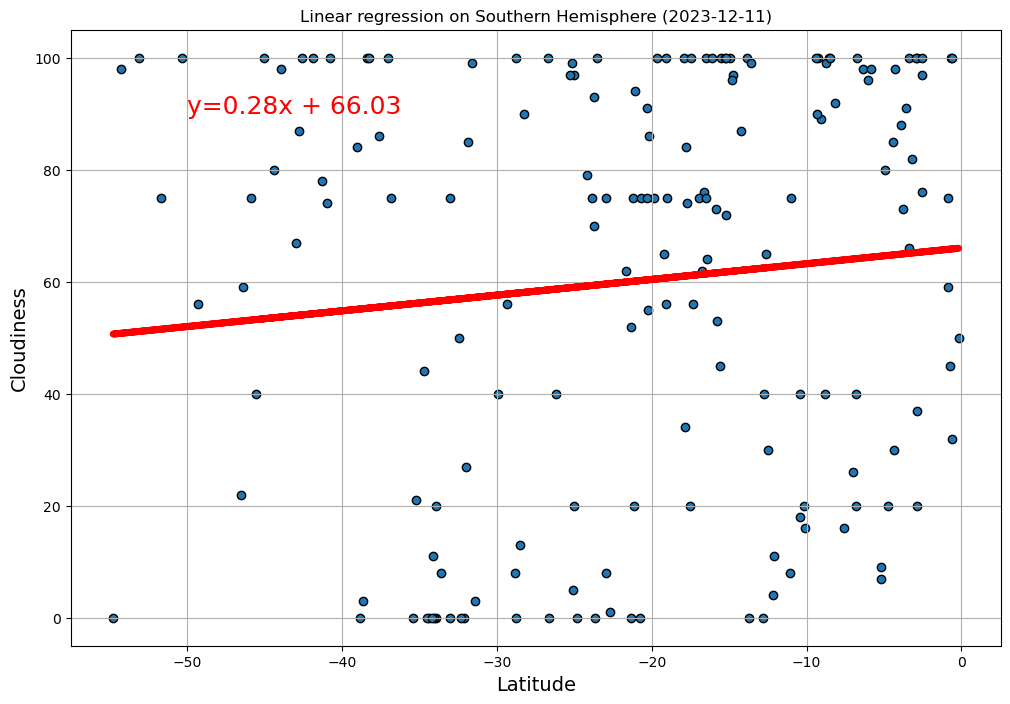

In [21]:
# Southern Hemisphere
lrChart(s_df.Lat,s_df['Cloudiness'],'Southern Hemisphere',-50,90)

**Discussion about the linear relationship:** The relationship between latitude and cloudiness does not strictly adhere to a linear pattern might be do to various  influencing factors such as proximity to water bodies, wind patterns, and seasonal variations.

### Wind Speed vs. Latitude Linear Regression Plot

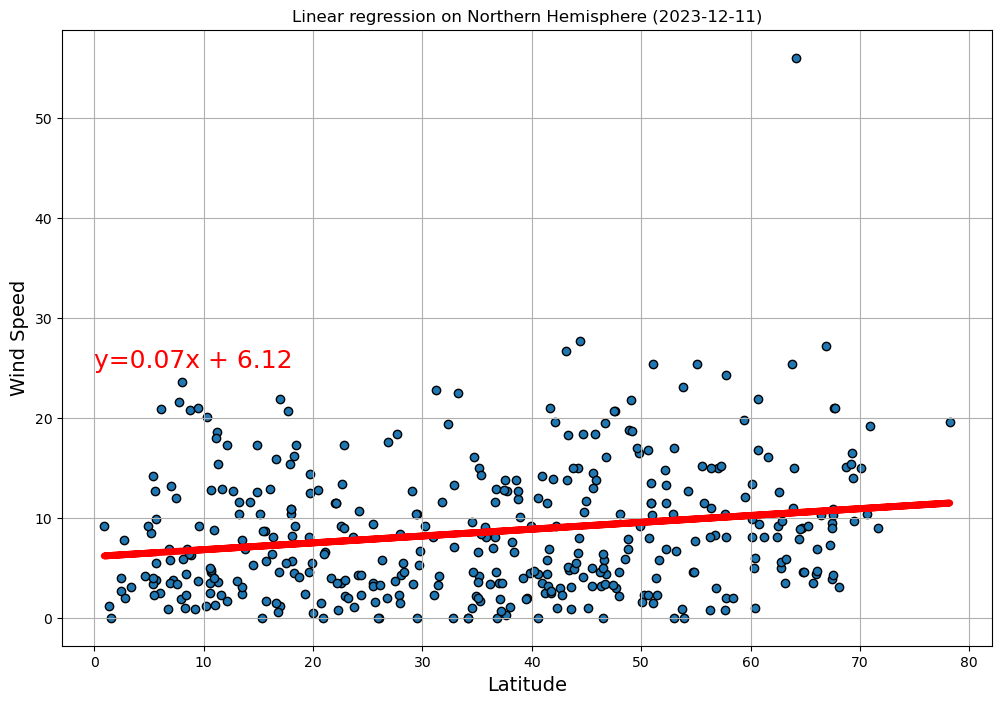

In [22]:
# Northern Hemisphere
lrChart(n_df.Lat,n_df['Wind Speed'],'Northern Hemisphere',0,25)

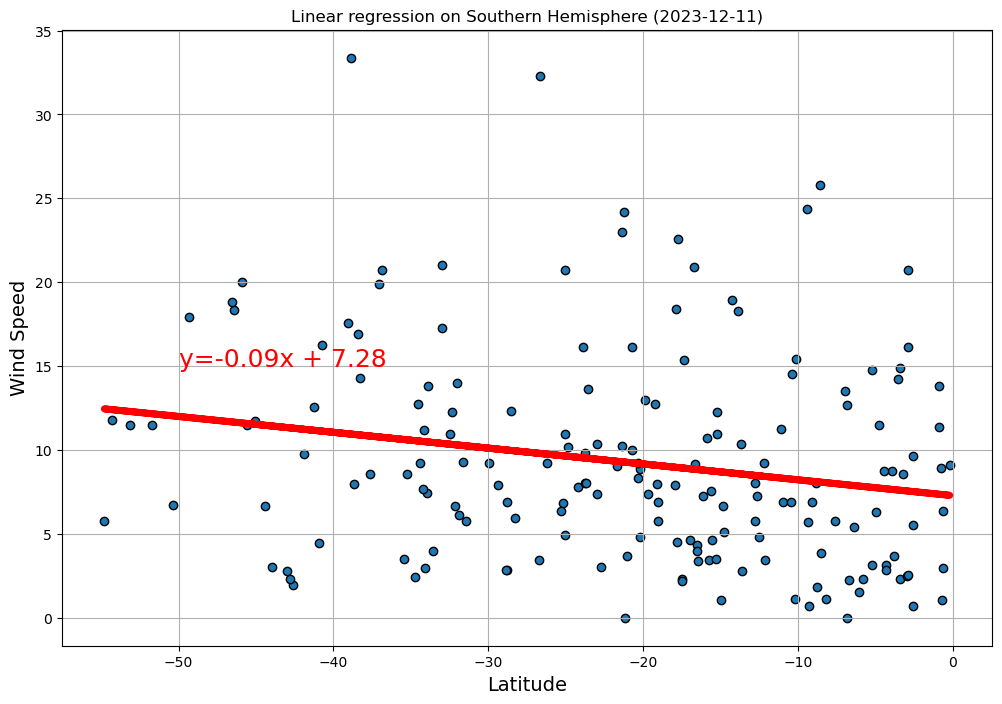

In [23]:
# Southern Hemisphere
lrChart(s_df.Lat,s_df['Wind Speed'],'Southern Hemisphere',-50,15)

**Discussion about the linear relationship:** The relationship between latitude and wind speed does not strictly adhere to a linear pattern might be do to various influencing factors such as wind patterns, and seasonal variations, topography.